<p style="font-size:30px"><b>EDA for the COVID-19 Impact Survey</b></p>
<p style="font-size:20px">by Adi Tyagi</p>

In this notebook, I conduct an EDA of the COVID-19 Impact Survey data. There are three datasets, each one representing a particular week during which the COVID-19 Impact Survey was administered nationally. We are particularly interested in the Chicago MSA responses.  

The following steps are followed:
1. Import libraries
2. Read in data 
3. Select necessary columns
4. Analysis of each of the columns
5. Final takeaways


**In this notebook, BCE means "Before Covid Era" and CE represents "Covid Era".) CE represents the time after April 1st 2020, which is commonly taken to be the start of the pandemic in the United States.** 


# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

In [7]:
datapath1 = "../Data/COVID Impact Survey/cis_week1.csv"
datapath2 = "../Data/COVID Impact Survey/cis_week2.csv"
datapath3 = "../Data/COVID Impact Survey/cis_week3.csv"
week1 = pd.read_csv(datapath1)
week2 = pd.read_csv(datapath2)
week3 = pd.read_csv(datapath3)


(8790, 177)

## Check data shape and sample sizes nationally
Each week 177 variables were collected nationally. 
- In week 1, the sample size was 8790.
- In week 2, the sample size rose to 8974.
- In week 3, the sample size dropped to 7505. 


In [164]:
print(week1.shape)
print(week2.shape)
print(week3.shape)

(8790, 177)
(8974, 177)
(7505, 177)


## Filter for Chicago area only

Let's filter for Chicago only and check sample sizes. 


- In week 1, the sample size was 431.
- In week 2, the sample size dropped to 418.
- In week 3, the sample size further dropped to 385. 


In [165]:
week1_chi = week1[week1['P_GEO'] == '(14) Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin']
print(week1_chi.shape)

week2_chi = week2[week2['P_GEO'] == '(14) Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin']
print(week2_chi.shape)

week3_chi = week3[week3['P_GEO'] == '(14) Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin']
print(week3_chi.shape)

(431, 177)
(418, 177)
(385, 177)


In [9]:
week1_chi = week1_chi.drop(['P_PANEL', 'NATIONAL_WEIGHT', 'REGION_WEIGHT', 'NATIONAL_WEIGHT_POP', 'NAT_WGT_COMB_POP', 
                'REG_WGT_COMB_POP', 'REGION_WEIGHT_POP'], axis = 1)
week1_chi.shape

(431, 170)

# Select  necessary columns

Now we select necessary columns based on our intuition

## List of columns to consider from CIS 
The dependent variable is:
- ECON5A_A: worried food would run out befor we got money to buy more
- ECON5A_B: food bought didn't last and didn't have money to buy more


The following variables are being considered based on intuition:
- SOC1: Trust community
- SOC2A: Talk neighbors during CE
- SOC3A: Communicate with friends during CE
- SOC4A: Volunteering during CE
- PHYS8: Physical health
- ECON1: Work for pay at a job/business
- ECON2: Hours worked last week
- ECON3: Hours worked per week during BC
- ECON4A: Employed 30 days from now likelihood
- ECON4B: Employed 3 months from now likelihood
- ECON6A: Applied for unemployment insurance in past 7 days
- ECON6B: Applied for SNAP in past 7 days
- ECON6C: Applied for TANF in past 7 days
- ECON6D: Applied for social security in past 7 days
- ECON6E: Applied for supplemental social security in past 7 days
- ECON6F: Applied for medicare/medicade in past 7 days
- ECON6G: Applied for other government aid in past 7 days
- ECON6H: Applied for union help in past 7 days
- ECON6I: Applied for church help in past 7 days
- ECON6J: Applied for other community organization in past 7 days
- ECON6K: Applied for food pantry in past 7 days
- ECON6L: Applied for other assistance in past 7 days 
- PHYS9A: Covered by employer health insurance 
- PHYS9B: Covered by directly purchased health insurance 
- PHYS9C: Convered by tricare/military health insurance 
- PHYS9D: Convered by medicare/medicaid health insurance 
- PHYS9E: Convered by medicare for elderly health insurance 
- PHYS9F: Convered by VA health insurance 
- PHYS9G: Convered by IHS health insurance 
- PHYS9H: Convered by other health insurance 
- PHYS5: Have you ever had covid-19 data?
- PHYS6: Death of family member/friend due to COVID-19?
- AGE7: 7 category of ages
- GENDER: gender (male/female)
- RACETH: Race/ethnicity
- RACE_R2: White/non white
- HHINCOME: Household income
- EDUCATION: Education
- P_OCCUPY2 (AmeriSpeak only): Occupation
- MARITAL (AmeriSpeak only): marriage status
- LGBT (AmeriSpeak only): lgbt 
- HHSIZE_1: Household size
- HH01S: Number of household members age 0-1
- HH25S: Number of household members 2-5
- HH612S: Number of house hold members 6-12
- HH1317S: Number of household members 13-17
- HH18OVS: Number of household members 18 over
- P_DENSE: Population density
- RACE1_BANNER: Race broken down into 5 categories
- INC_BANNER: income banner
- AGE_BANNER: age banner
- HH_BANNER: Household structure banner

**The total number of relevant columns considered is 55 (down from 177).**

In [166]:
selected_vars = [
    'SU_ID','ECON5A_A',
    'ECON5A_B',
    'SOC1','SOC2A','SOC3A','SOC4A', 
    'PHYS8', 
    'ECON1','ECON2', 'ECON3','ECON4A','ECON4B',
    'ECON6A','ECON6B','ECON6C','ECON6D','ECON6E','ECON6F','ECON6G','ECON6H','ECON6I','ECON6J','ECON6K','ECON6L',
    'PHYS9A','PHYS9B','PHYS9C','PHYS9D','PHYS9E','PHYS9F','PHYS9G','PHYS9H','PHYS5','PHYS6',
    'AGE7',
    'GENDER',
    'RACETH',
    'RACE_R2',
    'HHINCOME',
    'EDUCATION',
    'P_OCCUPY2',
    'MARITAL',
    'LGBT',
    'HHSIZE1','HH01S','HH25S','HH612S','HH1317S','HH18OVS',
    'P_DENSE',
    'RACE1_BANNER',
    'INC_BANNER',
    'AGE_BANNER',
    'HH_BANNER'    
]

week1_chi = week1_chi[selected_vars]
print(week1_chi.shape)
week2_chi = week2_chi[selected_vars]
print(week2_chi.shape)
week3_chi = week3_chi[selected_vars]
print(week3_chi.shape)

(431, 55)
(418, 55)
(385, 55)


# Analsis for each column

In the interest of brevity, I only analyze each column in the week1 data. I leave the analysis of week2, week3 data if time permits later. 

## Food Insecurity

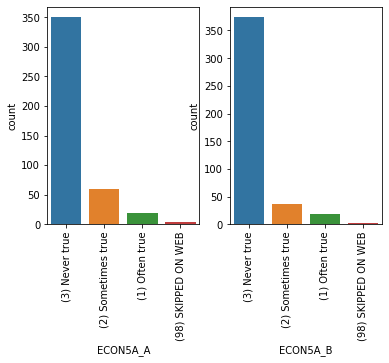

In [11]:
#visualize the food insecurity variables
dep_vars = ['ECON5A_A', 'ECON5A_B']
i = 1
for var in dep_vars:
    plt.subplot(1,2,i)
    sns.countplot(week1_chi[var])
    plt.xticks(rotation = 90)
    i = i + 1

## Social variables
I now analyze the social variables. They represent:
    
- SOC1: Trust community
- SOC2A: Talk neighbors during CE
- SOC3A: Communicate with friends during CE
- SOC4A: Volunteering during CE

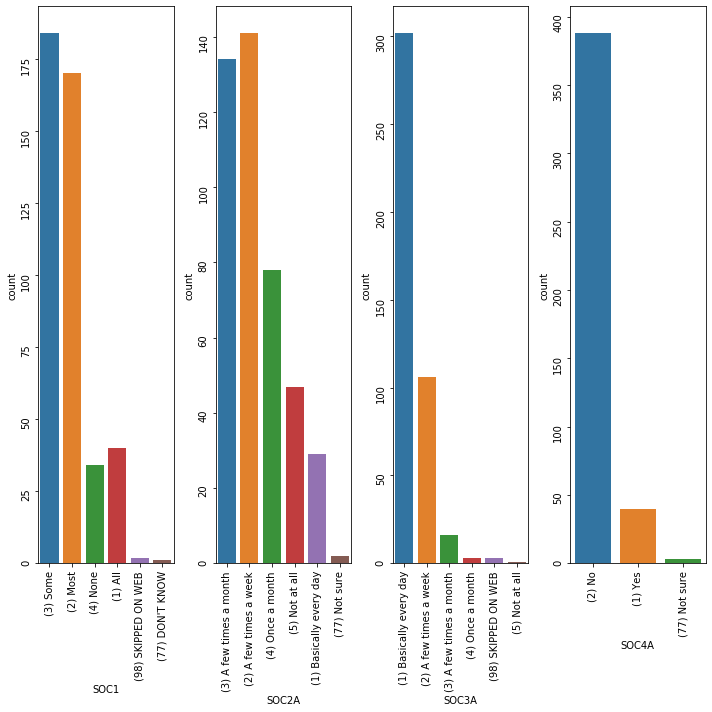

In [48]:
# social variables
soc_vars = ['SOC1', 'SOC2A', 'SOC3A', 'SOC4A']
i = 0
fig, ax = plt.subplots(1,4, figsize = (10,10))
#plt.setp(axa.xaxis.get_majorticklabels(), rotation=45)
for var in soc_vars:
    sns.countplot(week1_chi[var], ax = ax[i])
    ax[i].tick_params(labelrotation = 90)
    i = i + 1
    plt.tight_layout()
    

## Physical health

PHYS8 represents the physical health of the survey participants. 



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

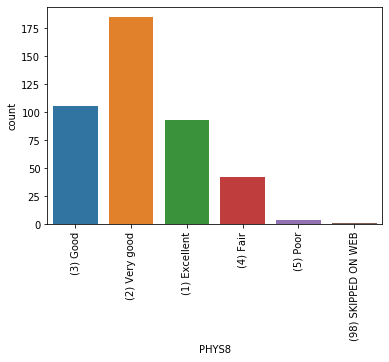

In [50]:
#physical variables distribution

sns.countplot(week1_chi['PHYS8'])
plt.xticks(rotation = 90)

## Economic variables

### Hours Worked
The following variables are represented below:
- ECON2: Number of hours worked last week
- ECON3: Avg. Number of hours worked per week BC


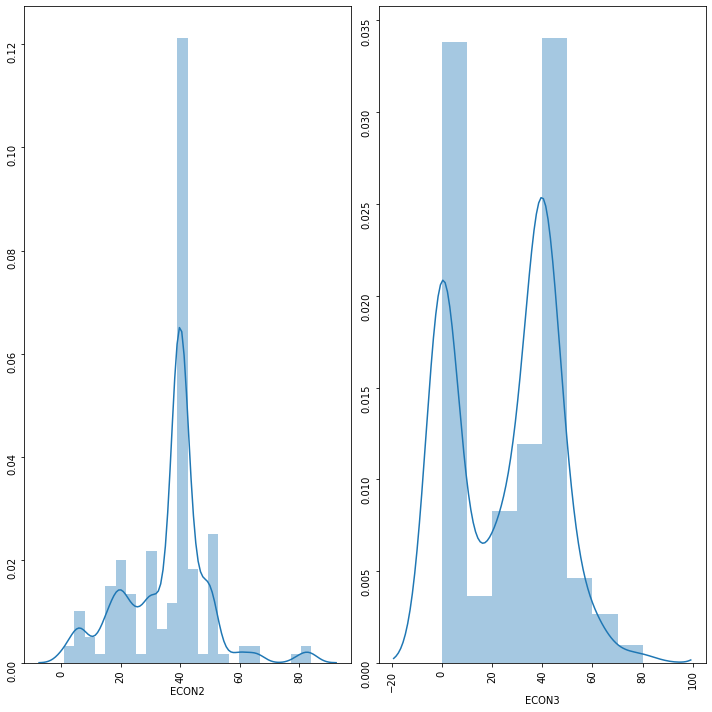

In [69]:
#econ var distribution
NONRESPONSES = ['(998) SKIPPED ON WEB', "(777) DON'T KNOW", 
                "(98) SKIPPED ON WEB"]

def replace_na_num_data(val):
    if val in NONRESPONSES:
        return np.nan
    else:
        return float(val)
def replace_na_cat_data(val):
    if val in NON_RESPONSES:
        return np.nan
    else:
        return val

econ_vars_1 = ['ECON2', 'ECON3']
i = 0
fig, ax = plt.subplots(1,2, figsize = (10,10))
for var in econ_vars_1:
    sns.distplot(week1_chi[var].apply(preprocess_num_data), ax = ax[i])    
    ax[i].tick_params(labelrotation = 90)
    i = i + 1
    plt.tight_layout()



### Economic assistance

THe following vars are analyzed:
- ECON4A: Employed 30 days from now likelihood
- ECON4B: Employed 3 months from now likelihood
- ECON6A: Applied for unemployment insurance in past 7 days
- ECON6B: Applied for SNAP in past 7 days
- ECON6C: Applied for TANF in past 7 days
- ECON6D: Applied for social security in past 7 days
- ECON6E: Applied for supplemental social security in past 7 days
- ECON6F: Applied for medicare/medicade in past 7 days
- ECON6G: Applied for other government aid in past 7 days
- ECON6H: Applied for union help in past 7 days
- ECON6I: Applied for church help in past 7 days
- ECON6J: Applied for other community organization in past 7 days
- ECON6K: Applied for food pantry in past 7 days
- ECON6L: Applied for other assistance in past 7 days

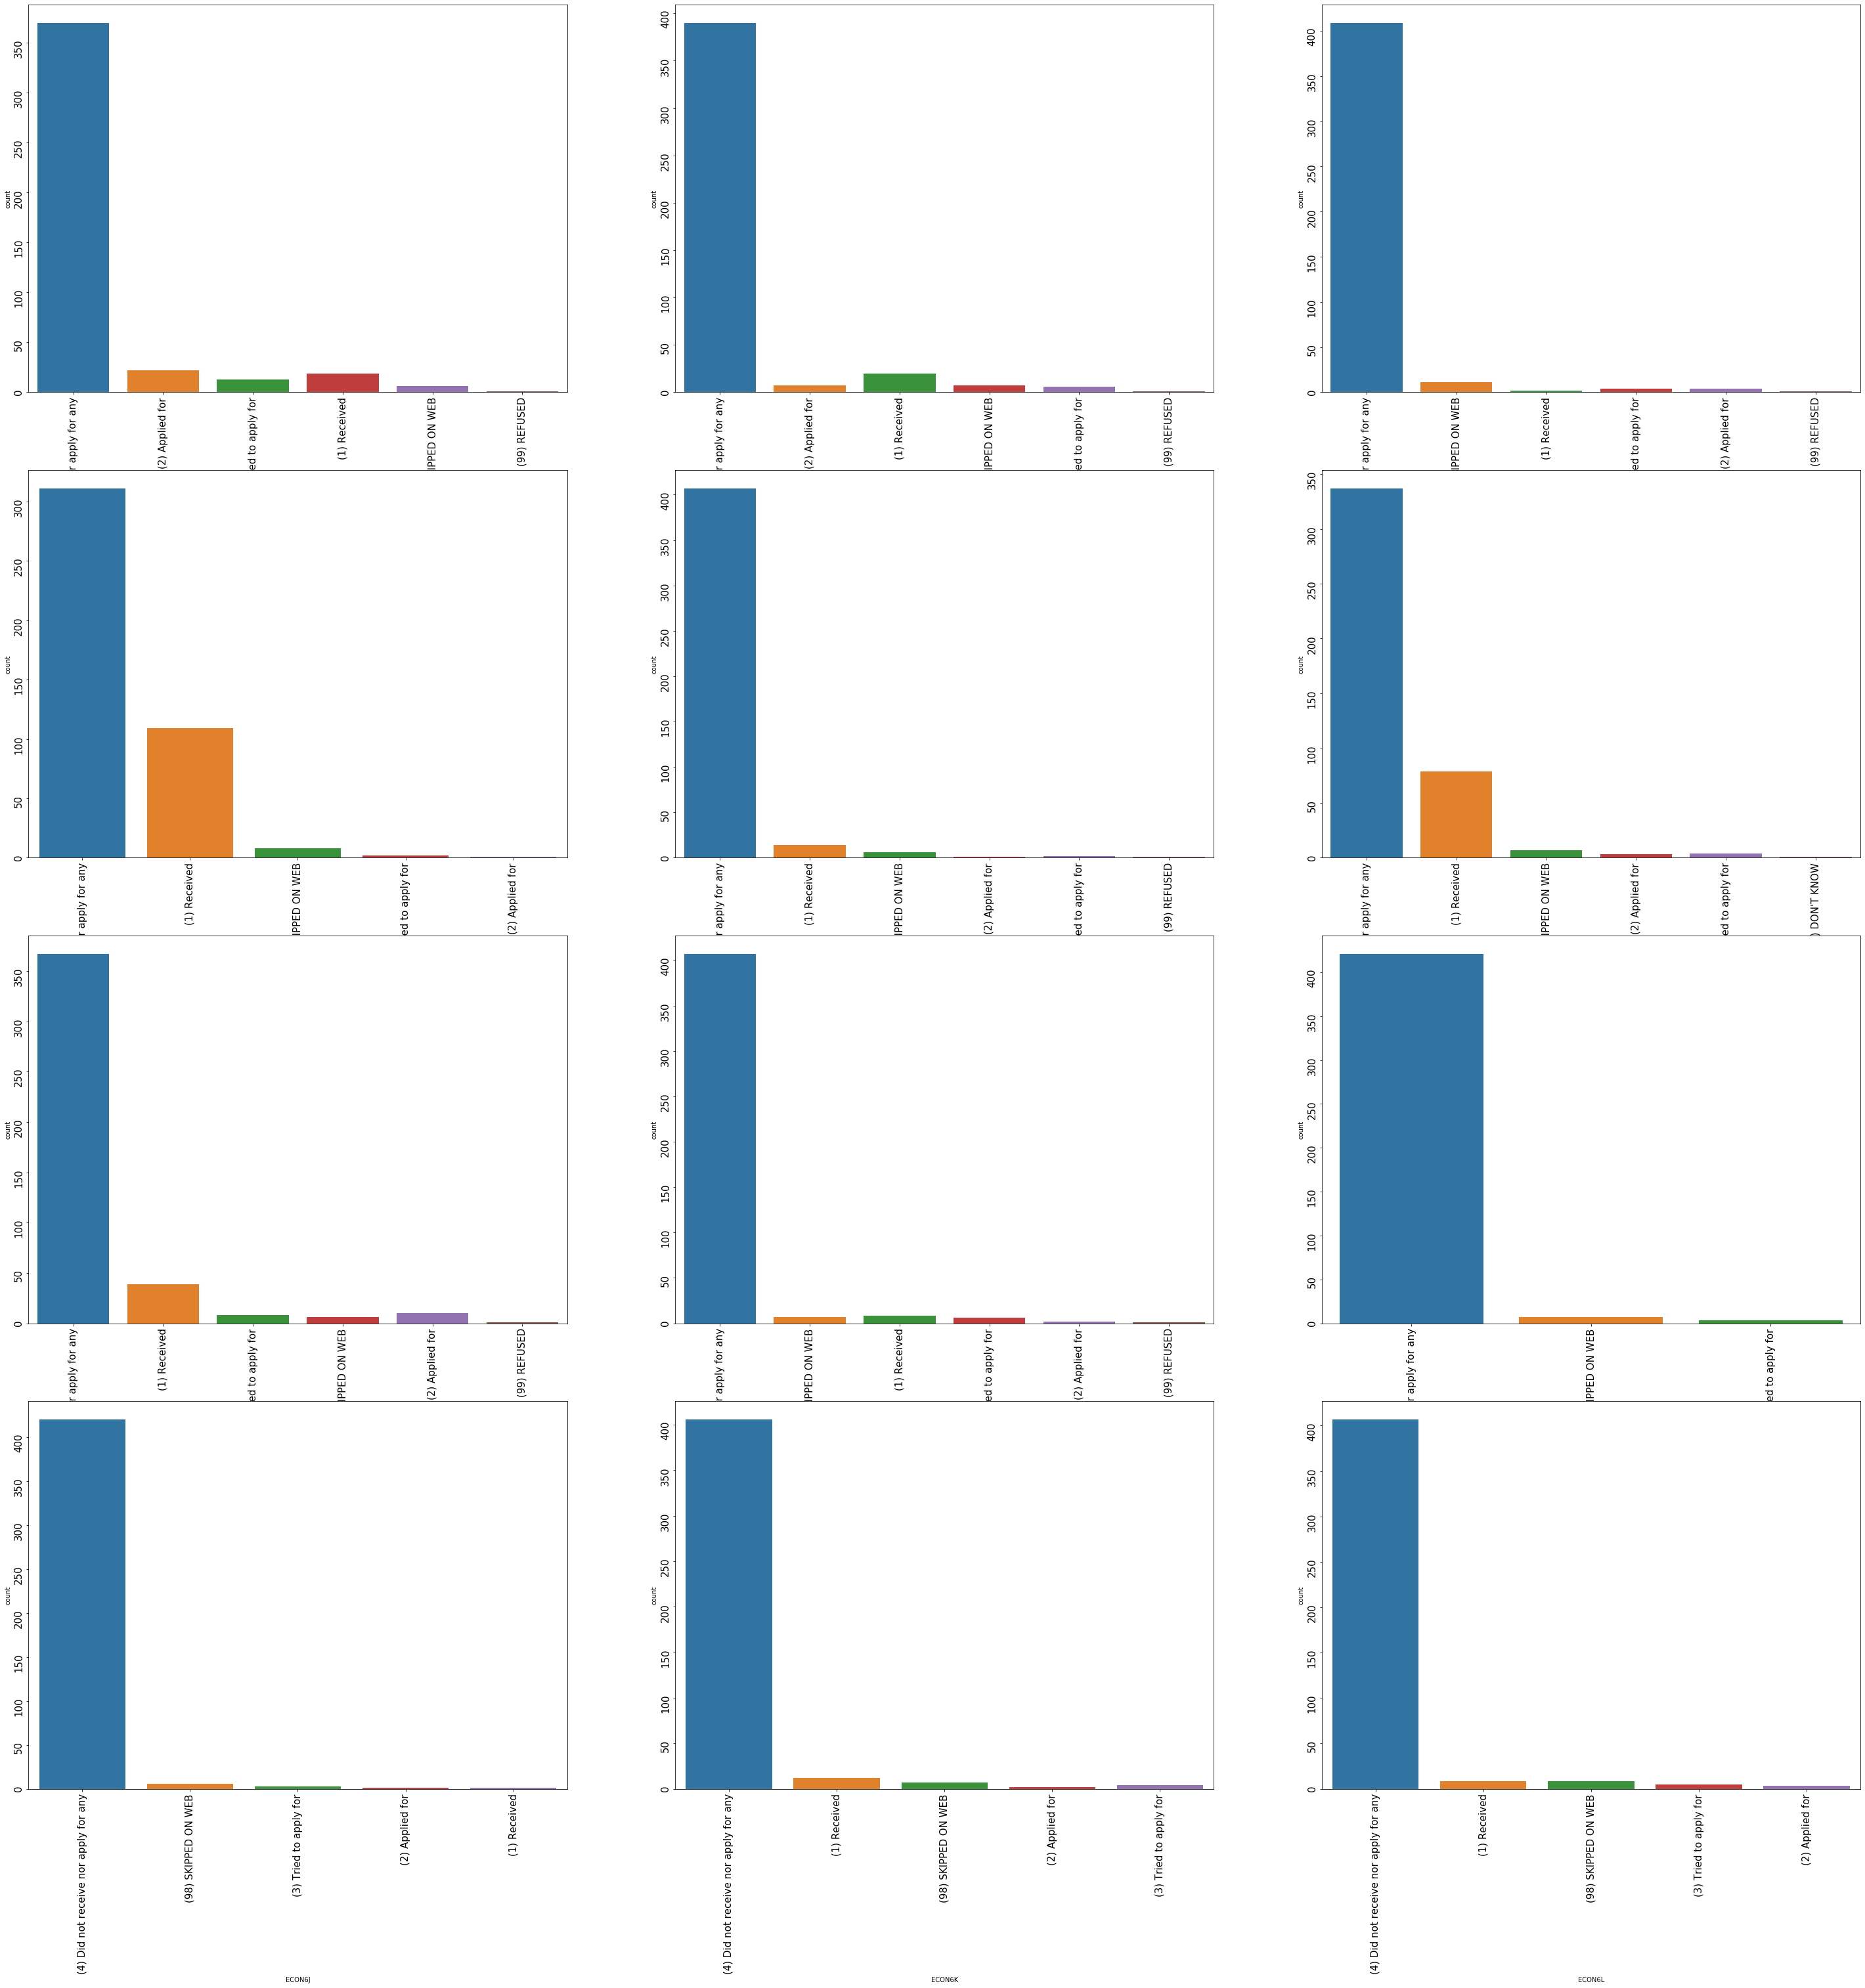

In [169]:
#applied for assistance
econ_asst_vars = ['ECON6A','ECON6B','ECON6C','ECON6D','ECON6E','ECON6F',
                  'ECON6G','ECON6H','ECON6I','ECON6J','ECON6K','ECON6L']
fig, ax = plt.subplots(4, 3, figsize = (50,50))

sns.countplot(week1_chi['ECON6A'], ax = ax[0,0])
sns.countplot(week1_chi['ECON6B'], ax = ax[0,1])
sns.countplot(week1_chi['ECON6C'], ax = ax[0,2])
sns.countplot(week1_chi['ECON6D'], ax = ax[1,0])
sns.countplot(week1_chi['ECON6E'], ax = ax[1,1])
sns.countplot(week1_chi['ECON6F'], ax = ax[1,2])
sns.countplot(week1_chi['ECON6G'], ax = ax[2,0])
sns.countplot(week1_chi['ECON6H'], ax = ax[2,1])
sns.countplot(week1_chi['ECON6I'], ax = ax[2,2])
sns.countplot(week1_chi['ECON6J'], ax = ax[3,0])
sns.countplot(week1_chi['ECON6K'], ax = ax[3,1])
sns.countplot(week1_chi['ECON6L'], ax = ax[3,2])
for i in range(4):
    for j in range(3):
        ax[i,j].tick_params(labelrotation = 90, labelsize = 15)



## Health Insurance

The following variables are analyzed:
- PHYS9A: Covered by employer health insurance 
- PHYS9B: Covered by directly purchased health insurance 
- PHYS9C: Convered by tricare/military health insurance 
- PHYS9D: Convered by medicare/medicaid health insurance 
- PHYS9E: Convered by medicare for elderly health insurance 
- PHYS9F: Convered by VA health insurance 
- PHYS9G: Convered by IHS health insurance 
- PHYS9H: Convered by other health insurance 




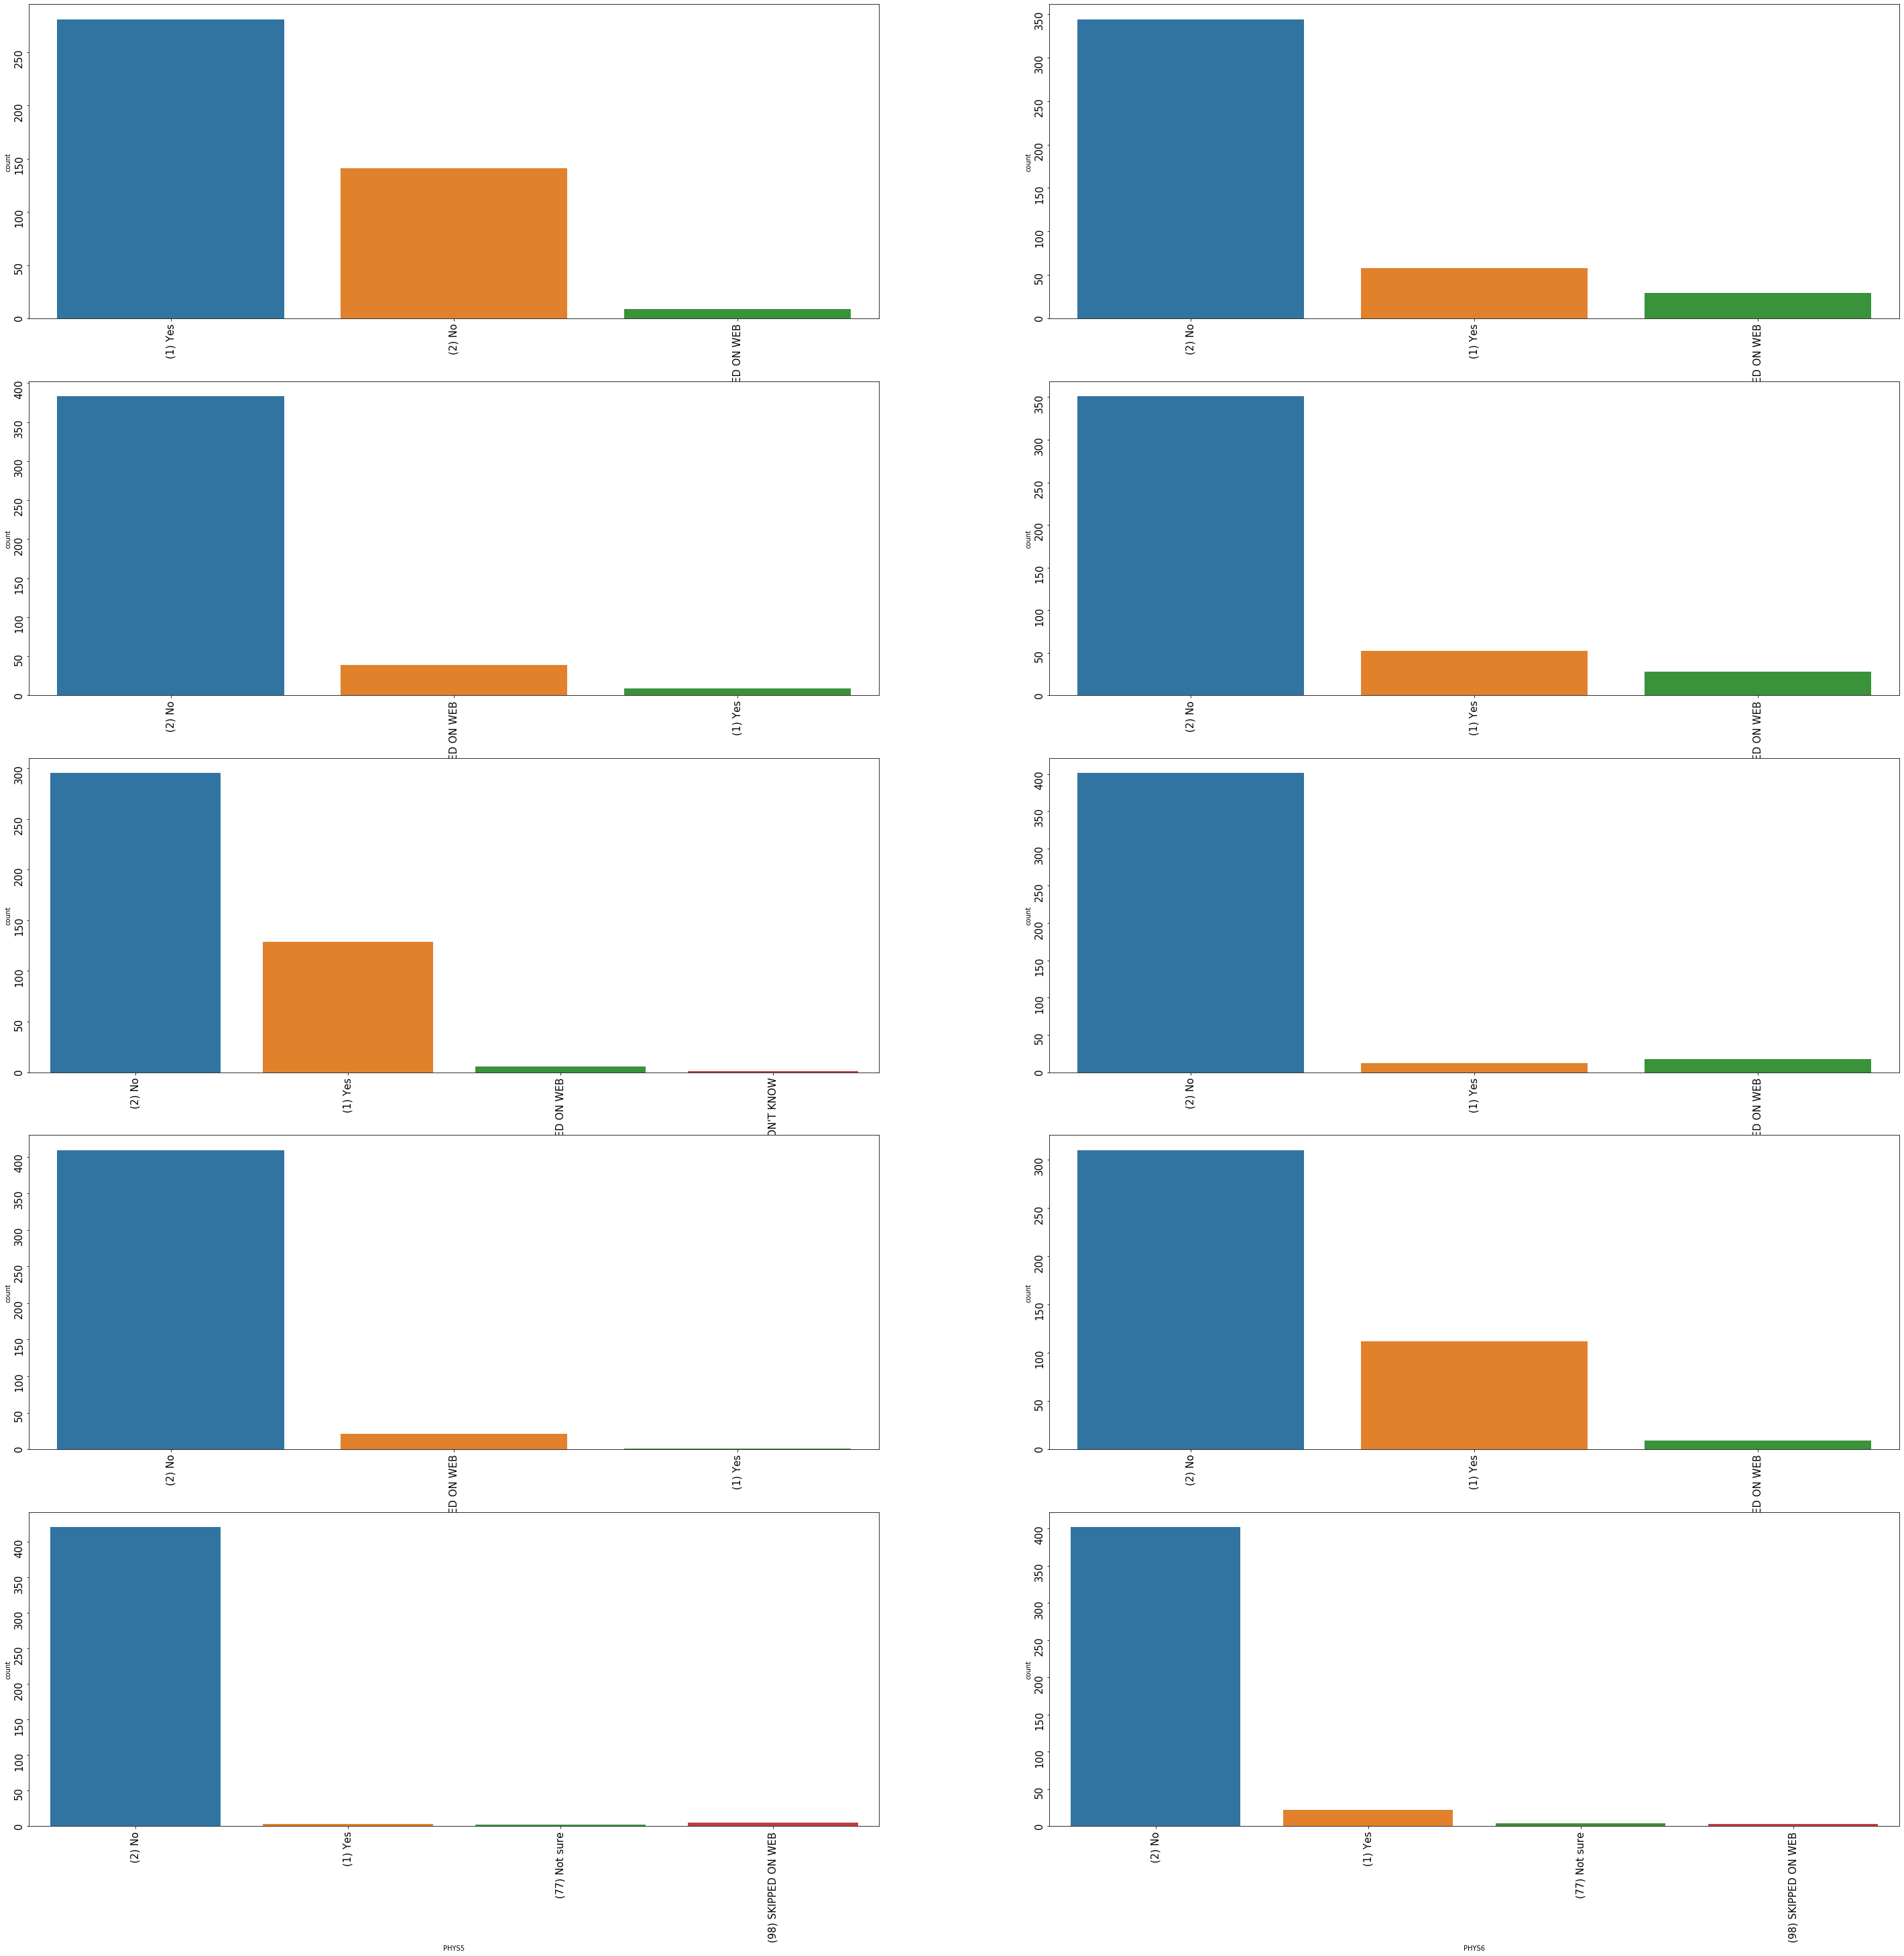

In [171]:
#insurance variables
#(98) SKIPPED ON WEB is nonresponse
phys_vars = ['PHYS9A','PHYS9B','PHYS9C','PHYS9D','PHYS9E',
             'PHYS9F','PHYS9G','PHYS9H','PHYS5','PHYS6']
fig, ax = plt.subplots(5, 2, figsize = (50,50))

sns.countplot(week1_chi['PHYS9A'], ax = ax[0,0])
sns.countplot(week1_chi['PHYS9B'], ax = ax[0,1])
sns.countplot(week1_chi['PHYS9C'], ax = ax[1,0])
sns.countplot(week1_chi['PHYS9D'], ax = ax[1,1])
sns.countplot(week1_chi['PHYS9E'], ax = ax[2,0])
sns.countplot(week1_chi['PHYS9F'], ax = ax[2,1])
sns.countplot(week1_chi['PHYS9G'], ax = ax[3,0])
sns.countplot(week1_chi['PHYS9H'], ax = ax[3,1])


sns.countplot(week1_chi['PHYS5'], ax = ax[4,0])
sns.countplot(week1_chi['PHYS6'], ax = ax[4,1])


for i in range(5):
    for j in range(2):
        ax[i,j].tick_params(labelrotation = 90, labelsize = 15)
        


## Demographic variables

The demographic variables are analyzed (age, gender, race, income, education, etc.)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

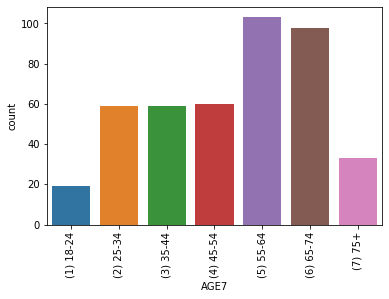

In [113]:
#marital, lgbt are empty
demo_vars = ['AGE7','GENDER','RACETH','RACE_R2','HHINCOME','EDUCATION','P_OCCUPY2']
#age distribution
sns.countplot(week1_chi['AGE7'], 
              order = ['(1) 18-24', '(2) 25-34',
                      '(3) 35-44', '(4) 45-54', '(5) 55-64', '(6) 65-74',
                      '(7) 75+'])
plt.xticks(rotation = 90)


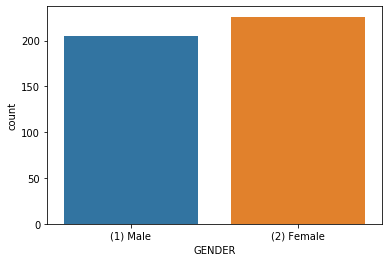

In [114]:
#gender
sns.countplot(week1_chi['GENDER'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

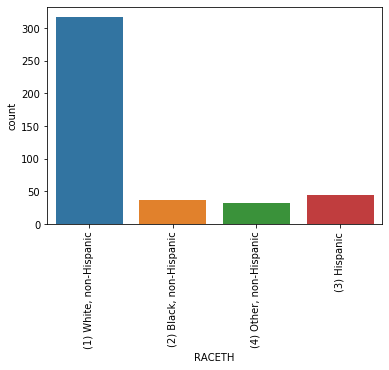

In [117]:
#race
sns.countplot(week1_chi['RACETH'])
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

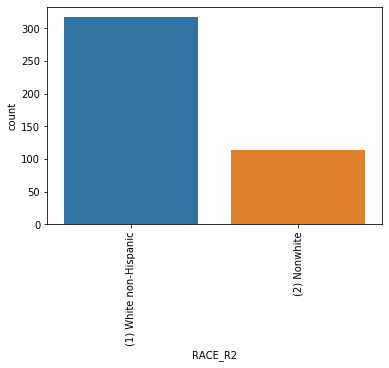

In [118]:
#white vs the rest
sns.countplot(week1_chi['RACE_R2'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

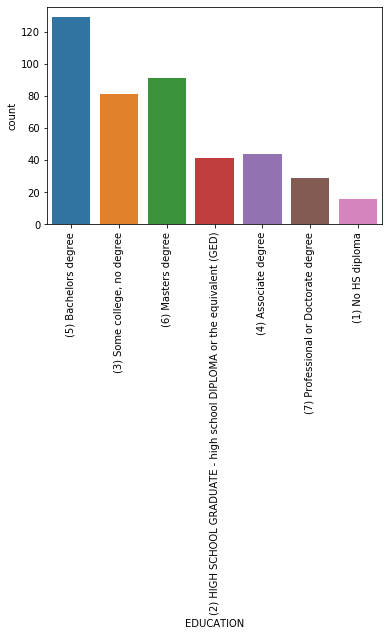

In [119]:
#education
sns.countplot(week1_chi['EDUCATION'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

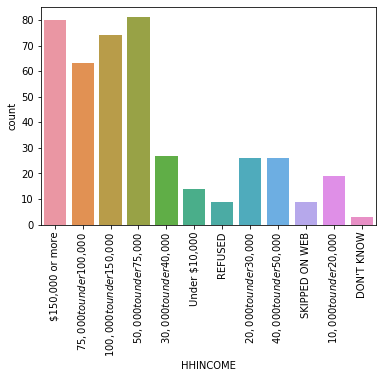

In [120]:
#hhincome
#SKIPPED ON WEB, DON'T KNOW, REFUSED ARE NONRESPONSES
sns.countplot(week1_chi['HHINCOME'])
plt.xticks(rotation = 90)

In [125]:
#ocupation P_OCCUPY2 is empty
week1_chi['P_OCCUPY2'].unique()
#marital is all NA
week1_chi['MARITAL'].unique()
#lgbt is all NA
week1_chi["LGBT"].unique()

array([nan], dtype=object)

In [127]:
print(['HHSIZE1','HH01S','HH25S','HH612S','HH1317S','HH18OVS',
    'P_DENSE',
    'RACE1_BANNER',
    'INC_BANNER',
    'AGE_BANNER',
    'HH_BANNER'    
])

['HHSIZE1', 'HH01S', 'HH25S', 'HH612S', 'HH1317S', 'HH18OVS', 'P_DENSE', 'RACE1_BANNER', 'INC_BANNER', 'AGE_BANNER', 'HH_BANNER']


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

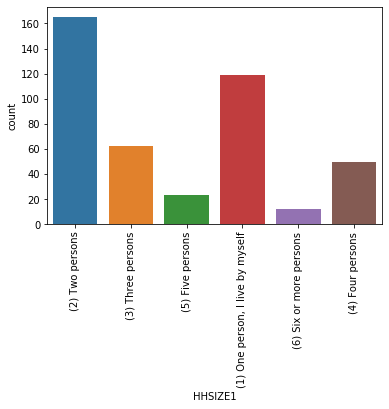

In [129]:
#should be converted to numerical - household size
sns.countplot(week1_chi['HHSIZE1'])
plt.xticks(rotation = 90)

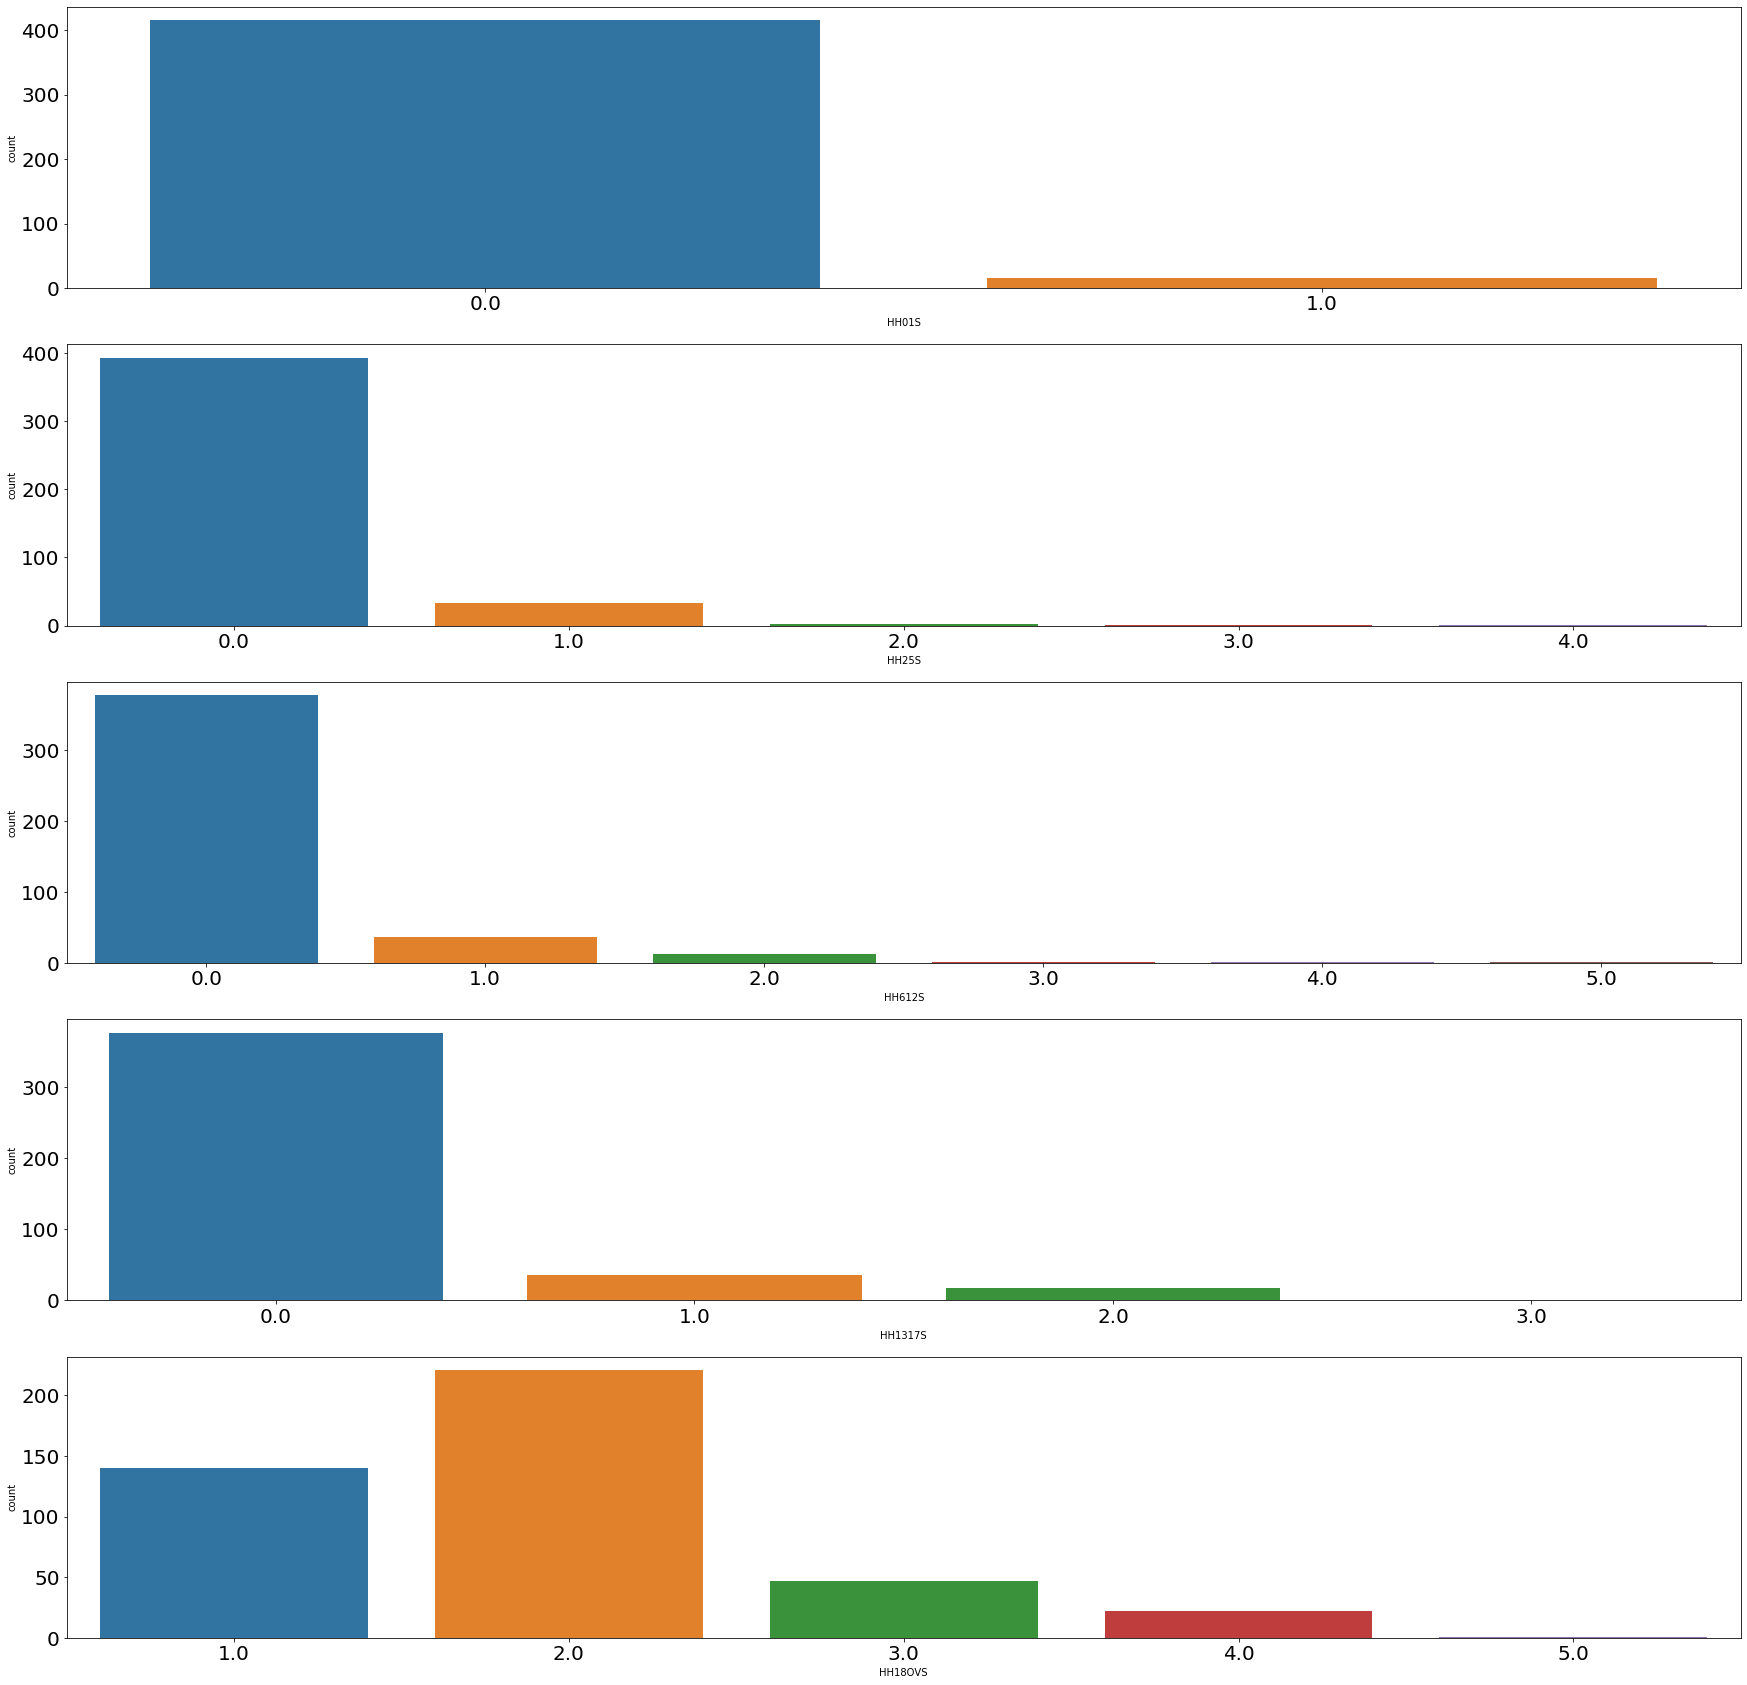

In [158]:
#convert to numerical type
household_age_struct = ['HH01S', 'HH25S', 'HH612S', 'HH1317S', 'HH18OVS']
i = 0
fig, axs = plt.subplots(5,1, figsize = (30,30))
for var in household_age_struct:
    sns.countplot(week1_chi[var].apply(replace_na_num_data), ax = axs[i])
    axs[i].tick_params(labelsize = 20)
    i = i + 1
    

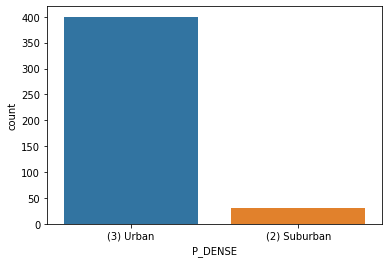

In [131]:
#urban or suburban residence
sns.countplot(week1_chi['P_DENSE'])

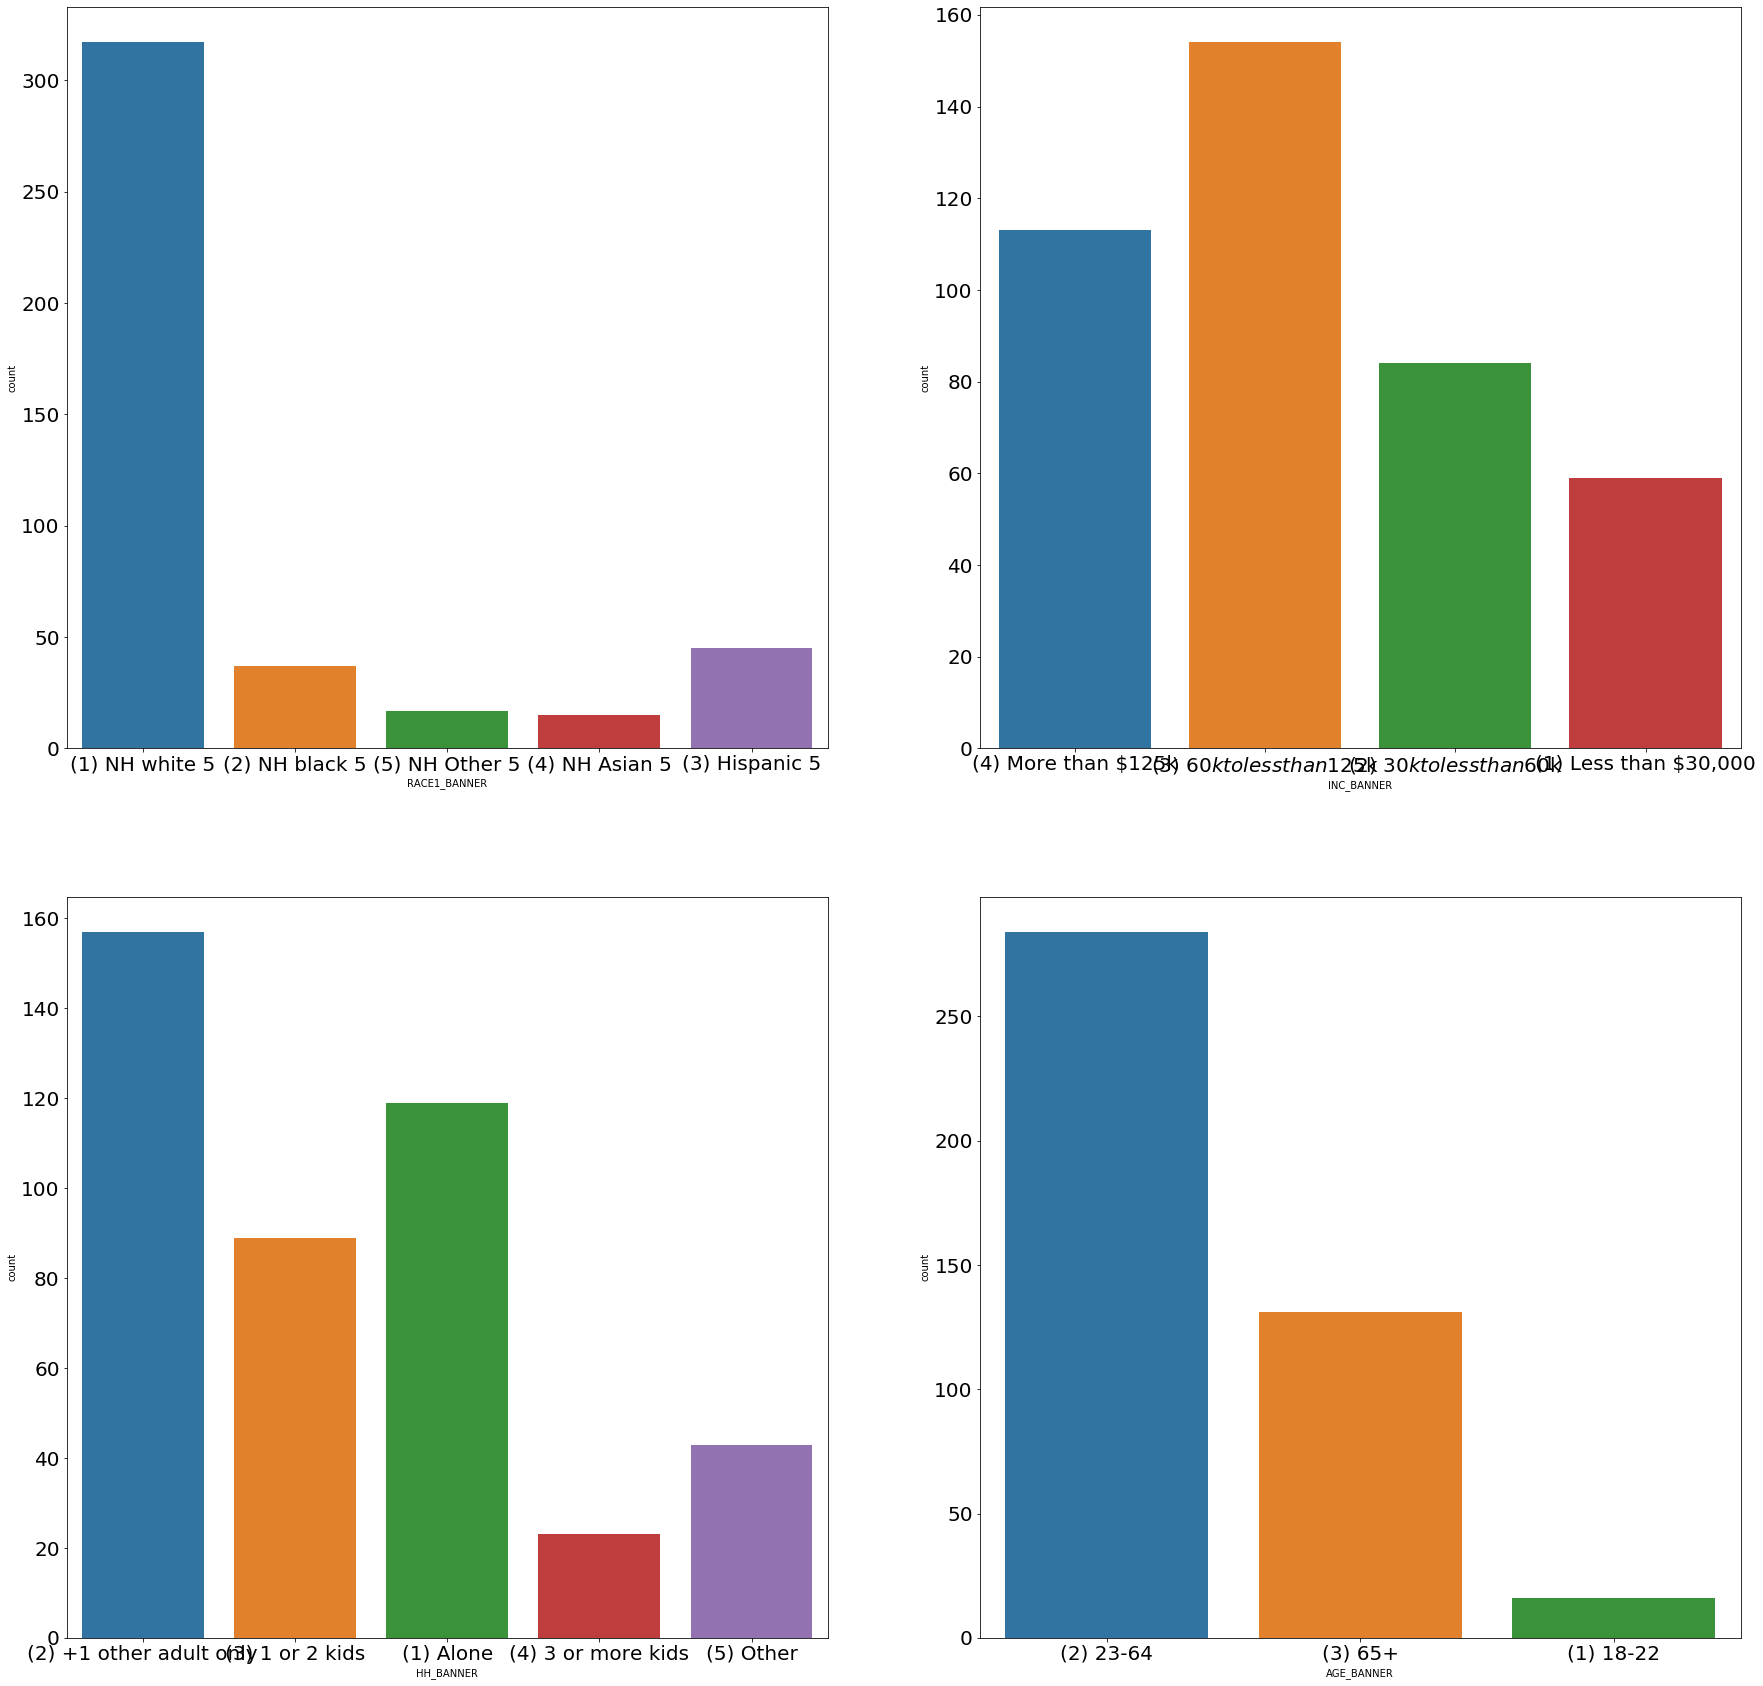

In [152]:
#do not include any of the banner variables
fig, axs = plt.subplots(2,2, figsize = (30,30))
sns.countplot(week1_chi['RACE1_BANNER'], ax = axs[0,0])
sns.countplot(week1_chi['INC_BANNER'], ax = axs[0,1])
sns.countplot(week1_chi['HH_BANNER'], ax = axs[1,0])
sns.countplot(week1_chi['AGE_BANNER'], ax = axs[1,1])
for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(labelsize = 20)

# EDA Takeaways

Compared to the initial variables we included, we need to remove the following variables:
- LGBT status
- Marital status
- RACE_R2
- P_OCCUPY2
- All the banner variables (AGE_BANNER, RACE1_BANNER, HH_BANNER, INC_BANNER)

The following strings are **NONRESPONSES** and should be replaced with `np.nan`:
- "(998) SKIPPED ON WEB"
- "(777) DON'T KNOW"
- "(98) SKIPPED ON WEB"
- "(77) DON'T KNOW"
- ONLY FOR HHINCOME the following are non responses:
    - "REFUSED",
    - "SKIPPED ON WEB", 
    - "DON'T KNOW"


The following type conversions need to happen:
- HHSIZE1 should be mapped to numerical type.
- Household age structure variables ('HH01S', 'HH25S', 'HH612S', 'HH1317S', 'HH18OVS') should be converted to numerical type. 
